# WEAT project
GD 노드 6

프로세스는 다음과 같다.
1. 데이터 로드 및 전처리
2. 편향성 측정을 위한 target, attribute 설정
3. 편향성 측정 (WEAT)
4. Fasttext에 대한 실험

## 1. 데이터 로드 및 전처리
영화 시놉시스 데이터의 편향성을 알아보기 위해서 명사를 추출하고 이에 대한 임베딩을 한다.   
이때 편향성을 측정하기 위해서 target으로 예술 영화와 일반 영화를 설정하고   
attribute로 영화의 각 장르로 설정한다.

In [1]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

### 명사 추출 

In [2]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [3]:
print(len(tokenized))

71156


### 임베딩(word2vec)
임베딩한 결과로 비슷한 단어들의 리스트를 보면 대부분 잘 나오는데   
다큐에 대한 비슷한 단어로 지역 이름을 볼 수 있는 것으로 보아   
다큐와 관련된 단어는 의미를 잘 학습하지 못 한 것을 볼 수 있다.

In [4]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[('작품', 0.9041378498077393),
 ('다큐멘터리', 0.860173761844635),
 ('드라마', 0.809423565864563),
 ('영화로', 0.7989707589149475),
 ('코미디', 0.7953214645385742),
 ('형식', 0.7915093898773193),
 ('에마데딘', 0.7634924650192261),
 ('주제', 0.7622937560081482),
 ('영상', 0.7621946930885315),
 ('소재', 0.7613174319267273)]

In [5]:
model.wv.most_similar(positive=['사랑'])

[('진심', 0.708071768283844),
 ('첫사랑', 0.703249990940094),
 ('목말', 0.6959591507911682),
 ('행복', 0.6871227622032166),
 ('이별', 0.676256537437439),
 ('애정', 0.6750743389129639),
 ('연애', 0.6749711632728577),
 ('가슴', 0.6712675094604492),
 ('우정', 0.6703492403030396),
 ('운명', 0.6637415885925293)]

In [6]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.8993803262710571),
 ('캐스팅', 0.8933894634246826),
 ('데뷔', 0.8817960023880005),
 ('시나리오', 0.8791415691375732),
 ('배우', 0.8731175661087036),
 ('영감', 0.8690257668495178),
 ('뮤지션', 0.8602502346038818),
 ('공연', 0.8596439361572266),
 ('대본', 0.8580760955810547),
 ('주연', 0.8578104376792908)]

In [7]:
model.wv.most_similar(positive=['다큐'])

[('전주', 0.9506300091743469),
 ('부산', 0.9005485773086548),
 ('광주', 0.8827415704727173),
 ('실험영화', 0.87296462059021),
 ('속초', 0.8682247400283813),
 ('일반', 0.8647458553314209),
 ('입체', 0.8630593419075012),
 ('초상', 0.861217737197876),
 ('단편영화', 0.8604570031166077),
 ('도그마', 0.8590399622917175)]

## 2. 편향성 측정을 위한 target, attribute 설정
예술 영화와 일반 영화를 target으로 설정하고 각 장르는 attribute로 설정한다.   
이때 단어를 추출할 때에 TFIDF 방식을 이용한다.

### Target 설정
명사만을 추출하여 TFIDF로 만들고   
대표단어 200개 중에서 서로 겹치는 것을 제외한 15개를 선정한다.

In [8]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [9]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [11]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [12]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 spart matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 spart matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(200):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(200):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 청년, 한국, 가지, 상처, 할머니, 목숨, 이상, 희망, 계획, 매력, 프랑스, 사회, 제안, 만남, 무엇, 거리, 이유, 파리, 여성, 정체, 매일, 바로, 시절, 보고, 진실, 홀로, 혼란, 배우, 선택, 다큐멘터리, 혼자, 작가, 갑자기, 일본, 고향, 마주, 도착, 병원, 문제, 로부터, 노래, 주인공, 자리, 대해, 미래, 갈등, 소식, 공연, 서울, 할아버지, 부부, 도움, 연애, 회사, 여자친구, 조직, 소개, 낯선, 찾기, 애인, 잠시, 당신, 고백, 역시, 아무, 시골, 동료, 편지, 촬영, 과정, 영국, 오늘, 마침내, 지구, 마치, 자살, 뉴욕, 탈출, 무대, 주변, 학생, 열정, 발생, 고양이, 고민, 천재, 첫사랑, 더욱, 납치, 약속, 복수, 역사, 의문, 동네, 행복, 파티, 현재, 달리, 여정, 전설, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로,

In [13]:
n = 15
w1_, w2_ = [], []
for i in range(200):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(200):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 
    
# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(200):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [14]:
print(target_art)

['청년', '프랑스', '만남', '파리', '혼란', '작가', '마주', '노래', '갈등', '소식', '공연', '연애', '여자친구', '소개', '낯선']


In [15]:
print(target_gen)

['애니메이션', '연출', '부문', '섹스', '의도', '부산', '그것', '독립', '경쟁', '소리', '부천', '살해', '현장', '자기', '페스티벌']


Duplicate key in file PosixPath('/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  NanumGothic')


/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


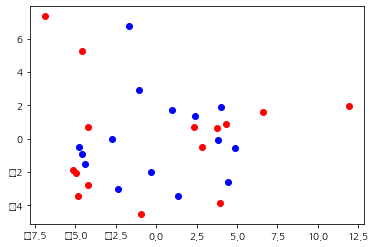

In [16]:
# visualization
from sklearn.decomposition import PCA
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')

### Attribute 설정
Target을 설정하는 것과 비슷한 과정으로 attribute를 설정한다.   

In [17]:
genre_txt = ['synopsis_SF.txt','synopsis_family.txt','synopsis_show.txt','synopsis_horror.txt',
             'synopsis_etc.txt','synopsis_documentary.txt','synopsis_drama.txt','synopsis_romance.txt',
             'synopsis_musical.txt','synopsis_mystery.txt','synopsis_crime.txt','synopsis_historical.txt',
             'synopsis_western.txt','synopsis_adult.txt','synopsis_thriller.txt','synopsis_animation.txt',
             'synopsis_action.txt','synopsis_adventure.txt','synopsis_war.txt','synopsis_comedy.txt',
            'synopsis_fantasy.txt']
genre_name = ['SF','가족','공연','공포',
              '기타','다큐멘터리','드라마','멜로로멘스',
              '뮤지컬','미스터리','범죄','사극',
              '서부극','성인물','스릴러','애니메이션',
              '액션','어드벤쳐','전쟁','코미디',
             '판타지']

genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

In [18]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [19]:
vectorizer_g = TfidfVectorizer()
X_genre = vectorizer_g.fit_transform(genre)

print(X_genre.shape)

(21, 42191)


In [20]:
m = [X_genre[i].tocoo() for i in range(X_genre.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []

words = []
for i in range(len(w)):
    wd = []
    for j in range(100):
        wd.append(vectorizer_g.get_feature_names()[w[i][j][0]])
    words.append(wd)
    
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        dup = 0
        for k in range(len(w)):
            if k != i  and vectorizer_g.get_feature_names()[w[i][j][0]] in words[k]:
                dup = 1
                break
        if dup == 0 and vectorizer_g.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer_g.get_feature_names()[w[i][j][0]])
            print(vectorizer_g.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()
    

SF: 외계, 행성, 시스템, 생명체, 스타크, 리플리, 과학자, 파괴, 켈빈, 컨트, 수퍼맨, 외계인, 분파, 연구, 개발, 
가족: 아주르, 낙타, 씨제이, 동구, 슈이트, 마갈, 미아, 펠리칸, 벤트, 케이시, 크리스마스, 최호, 혜지, 유나, 테리, 
공연: 실황, 올레, 오텔로, 리골레토, 백작, 프레, 베르디, 비바, 콘서트, 백작부인, 반니, 아리아, 미노, 차이코프스키, 라다, 
공포: 악령, 좀비, 저주, 일행, 악몽, 귀신, 저택, 현상, 사라, 영혼, 살인마, 기운, 그날, 치료, 분홍신, 
기타: 뉴미디어, 아시아나, 이미지, 상영작, 지하철, 청소년, 유럽, 포럼, 메트로, 단편영화, 실험영화, 대화, 거리, 광주, 프라이드, 
다큐멘터리: 다큐, 다큐멘터리, 기록, 카메라, 투쟁, 인디다큐페스티발, 지금, 현재, 문화, 건축, 인터뷰, 중국, 변화, 운동, 자연, 
드라마: 시절, 고향, 청년, 자기, 이상, 선택, 전주, 이유, 동네, 그것, 자리, 오늘, 선생님, 소개, 대신, 
멜로로멘스: 애인, 남자친구, 선배, 커플, 고백, 동거, 이혼, 시아버지, 만남, 은밀, 첫사랑, 직장, 언니, 형부, 매일, 
뮤지컬: 뮤지컬, 에스메랄다, 충무로, 모차르트, 니웨, 바흐, 페뷔스, 프롤, 모도, 제루샤, 샤오캉, 데이비, 팬텀, 크리스틴, 노트르담, 
미스터리: 민혁, 미스터리, 방독면, 소설, 랭던, 몰카, 혼란, 지목, 누군가, 거미숲, 작가, 사이먼, 누구, 의사, 수연, 
범죄: 한길수, 프랭크, 파푸아, 금고, 테러범, 강도, 마샨, 거래, 달러, 검사, 철중, 도미, 사기꾼, 범행, 폭력, 
사극: 조선, 신기전, 아가멤논, 황제, 루안, 하선, 윤서, 트로이, 세자, 허균, 노준, 채선, 신재효, 히파티아, 권력, 
서부극: 서부, 보안관, 벌린, 카우보이, 그레이프바인, 헨리, 개릿, 무법자, 프린트, 마적, 태구, 현상금, 분노, 버질, 랜던, 
성인물: 에피소드, 유이, 욕구불만, 손님, 유우, 성적, 성관계, 유코

##  3. 편향성 측정 (WEAT)
Target에 대한 모든 attribute 쌍에 대해서 편향성 WEAT를 계산한다.  
이에 대한 결과를 시각화까지 한다.

In [21]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [22]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B#, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [23]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [24]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.6 or matrix[i][j] < -1.6:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 멜로로멘스 -1.709036
공연 멜로로멘스 -1.7340963
기타 멜로로멘스 -1.7517473
다큐멘터리 멜로로멘스 -1.7167135
멜로로멘스 범죄 1.7538109
멜로로멘스 애니메이션 1.6949078
멜로로멘스 액션 1.7884055
멜로로멘스 전쟁 1.7501467


### 시각화
결과를 보면 절대값이 1.6보다 큰 편향성을 보이는 것은 멜로로멘스와 관련된 쌍임을 알 수 있다.

<AxesSubplot:>

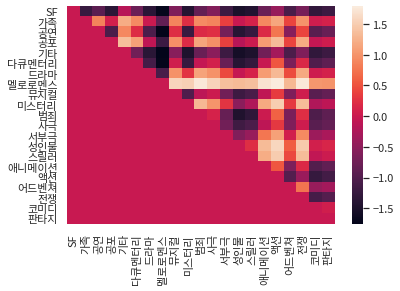

In [25]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name)
ax

SF 멜로로멘스 -1.709036


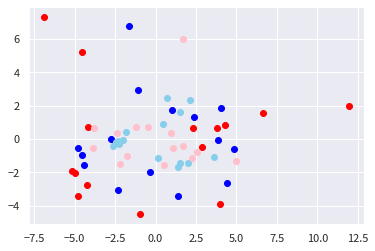

공연 멜로로멘스 -1.7340963


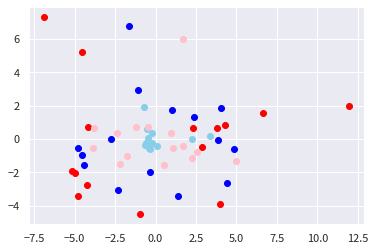

기타 멜로로멘스 -1.7517473


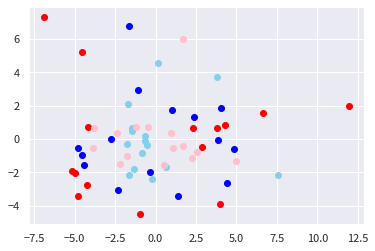

다큐멘터리 멜로로멘스 -1.7167135


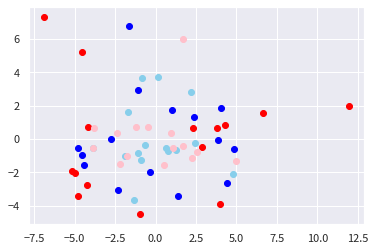

멜로로멘스 범죄 1.7538109


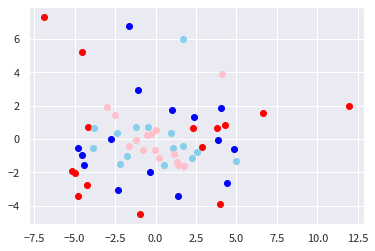

멜로로멘스 애니메이션 1.6949078


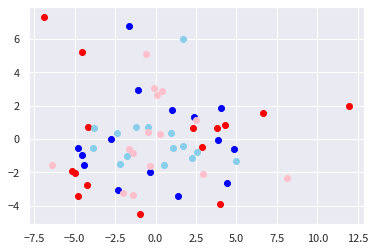

멜로로멘스 액션 1.7884055


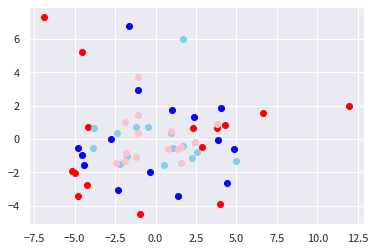

멜로로멘스 전쟁 1.7501467


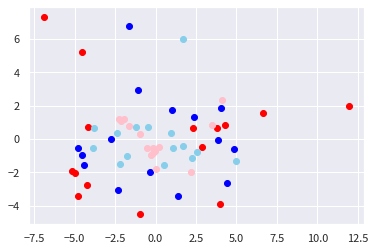

In [26]:
from sklearn.decomposition import PCA
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
# pc_X = pca.fit_transform(X)
# pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.6 or matrix[i][j] < -1.6:
            X = np.array([model.wv[word] for word in attributes[i]])
            Y = np.array([model.wv[word] for word in attributes[j]])
            pc_X = pca.fit_transform(X)
            pc_Y = pca.fit_transform(Y)

            fig, ax = plt.subplots()
            ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
            ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
            ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
            ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')
            print(genre_name[i], genre_name[j], matrix[i][j])
            plt.show()

## 4. Fasttext 에 대한 실험
앞에서 word2vec 임베딩이 아닌 fasttext에 대해서 실험을 동일하게 진행을 하였다.   
결과를 보면 word2vec 보다 편향성이 낮게 나온 것을 확인할 수 있다.

### 임베딩

In [27]:
from gensim.models import FastText
fasttext_model = FastText(tokenized, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [28]:
fasttext_model.wv.most_similar(positive=['영화'])

[('영화로', 0.8165848851203918),
 ('극영화', 0.7917303442955017),
 ('가족영화', 0.7855702638626099),
 ('무성영화', 0.7749965786933899),
 ('호러영화', 0.767106294631958),
 ('공포영화', 0.7601042985916138),
 ('중국영화', 0.756523609161377),
 ('액션영화', 0.7493290305137634),
 ('모큐멘터리', 0.746667742729187),
 ('미국영화', 0.7428145408630371)]

In [29]:
fasttext_model.wv.most_similar(positive=['사랑'])

[('옛사랑', 0.7500046491622925),
 ('삼각관계', 0.6992982625961304),
 ('연애관', 0.6662273406982422),
 ('행복감', 0.6627658009529114),
 ('해피엔딩', 0.6594241857528687),
 ('비랄', 0.6524941921234131),
 ('결실', 0.6517512798309326),
 ('소울메이트', 0.6500110626220703),
 ('심성', 0.6498023271560669),
 ('차이점', 0.6430630087852478)]

In [30]:
fasttext_model.wv.most_similar(positive=['연극'])

[('햄릿', 0.78570556640625),
 ('대본', 0.7678070068359375),
 ('스탭들', 0.7584375739097595),
 ('엑스트라', 0.7471652626991272),
 ('연극배우', 0.7459169626235962),
 ('리허설', 0.7392194867134094),
 ('연출가', 0.7385221719741821),
 ('에로영화', 0.7369958162307739),
 ('연기자', 0.7330494523048401),
 ('출연자', 0.7308616638183594)]

In [31]:
fasttext_model.wv.most_similar(positive=['다큐'])

[('영정', 0.8354824185371399),
 ('디아스포라', 0.8339192867279053),
 ('프롤로그', 0.8307415843009949),
 ('네이션', 0.8261919021606445),
 ('정지연', 0.8214368224143982),
 ('김영진', 0.8197163939476013),
 ('문웅', 0.8167285919189453),
 ('김지훈', 0.8164557814598083),
 ('이수현', 0.8135167360305786),
 ('다큐멘터리', 0.8038017153739929)]

### 편향성 측정 및 시각화 

In [32]:
f_matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
A = np.array([fasttext_model.wv[word] for word in target_art])
B = np.array([fasttext_model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([fasttext_model.wv[word] for word in attributes[i]])
        Y = np.array([fasttext_model.wv[word] for word in attributes[j]])
        f_matrix[i][j] = weat_score(X, Y, A, B)

In [33]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if f_matrix[i][j] > 1.6 or f_matrix[i][j] < -1.6:
            print(genre_name[i], genre_name[j],f_matrix[i][j])

SF 멜로로멘스 -1.6465364
기타 멜로로멘스 -1.6642542


<AxesSubplot:>

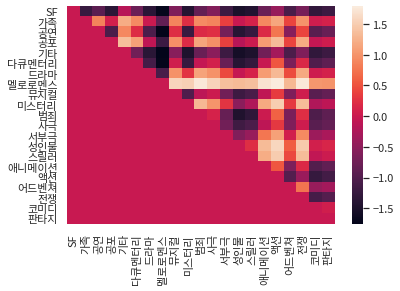

In [34]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name)
ax

SF 멜로로멘스 -1.6465364


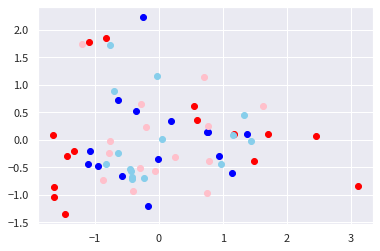

기타 멜로로멘스 -1.6642542


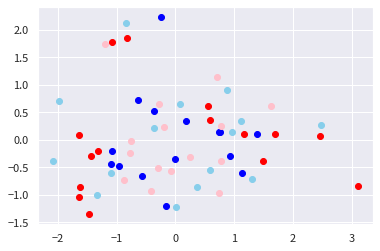

In [35]:
from sklearn.decomposition import PCA
A = np.array([fasttext_model.wv[word] for word in target_art])
B = np.array([fasttext_model.wv[word] for word in target_gen])

pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
# pc_X = pca.fit_transform(X)
# pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if f_matrix[i][j] > 1.6 or f_matrix[i][j] < -1.6:
            X = np.array([fasttext_model.wv[word] for word in attributes[i]])
            Y = np.array([fasttext_model.wv[word] for word in attributes[j]])
            pc_X = pca.fit_transform(X)
            pc_Y = pca.fit_transform(Y)

            fig, ax = plt.subplots()
            ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
            ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
            ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
            ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')
            print(genre_name[i], genre_name[j], f_matrix[i][j])
            plt.show()

## 회고 및 루브릭 평가

### 루브릭 평가 항목
1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다.
	(워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나왔다.)
2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성하였다.
	(타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋이 만들어졌다.)
3. WEAT score 계산 및 시각화를 정상적으로 진행하였다.
	(전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.)

### 평가 항목에 대한 수행
1. 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다. 
2. 영화 구분, 장르별로 target, attribute에 대한 대표성 있는 단어 셋을 생성했다.
3. WEAT 점수를 계산하고 각 점수에 대한 행렬과 WEAT 점수에 대해서 시각화를 하였다.

### 회고

노션에 공지된 꼭 포함이 되어야 할 점
- 이번 프로젝트에서 **어려웠던 점,**
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
- **자기 다짐**

---
- **어려웠던 점**    
처음에 노드가 정확히 어떤 task를 원하는 지 갈피를 잡지 못 해서 헤맸다. 그리고 영화에 대해서 잘 모르기 때문에 어떤 장르가 편향성을 가졌는지에 대해서 판단할 근거가 없었던 것 같다. 그리고 정확히 노드에서 어떤 편향성을 원했는지 모르겠다. 정확히 따져보면 결국에 사람마다 주관이 다르기 때문에 편향성도 사람마다 다르게 생각할 수 있는데 '상식'이라는 애매한 표현으로 여러 생각만 많이 하게 되고 결국 예술 영화와 일반 영화에 대해서 찾아봤는데 점점 경계가 모호해진다는 이야기만 알 수 있었다.

---
- **알아낸 점**    
편향성을 측정하기 위해서 WEAT 점수를 사용한다는 것을 알 수 있었다.

- **모호한 점**    
프로젝트 자체가 모호하다. 정확히 어떤 것을 목적으로 하는지를 모르겠다. 단순히 데이터의 편향성이 존재할 수 있다는 것이라면 going deeper에서 다룬 내용은 아니라고 생각한다.(차라리 exploration에서 다루는 것이 맞다고 생각한다.)

---
- **시도한 것들**   
임베딩에 대한 WEAT 점수를 계산하였다. 그리고 word2vec 뿐만 아니라 fasttext에 대한 실험도 하여 임베딩 간의 편향성 차이를 알 수 있었다.

---
- **루브릭 평가 관련 지표**   
제 예상에는 모두 달성되었다고 생각한다. 그 이유는 위에 있는 **평가 항목에 대한 수행**에 나와있다.  
- **자기 다짐** 및 **나의 생각들**      
위에서도 적었지만 이번 노드는 어떤 목적으로 하는 지 잘 모르겠다. 그래도 데이터 편향성을 계산할 때 WEAT를 사용할 수 있다는 점은 배운 것 같다. 그리고 편향성은 당연하게도 서로 관련 있는 데이터에서 일어날 수 밖에 없는 것인데 노드에서 너무 나쁜 식으로 몰아 가는 것 같아서 좀 그랬다.